1. Setup & Data Preparation

In [1]:
!pip install numpy pandas matplotlib

   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ------- -------------------------------- 2.4/12.9 MB 13.4 MB/s eta 0:00:01
   -------------- ------------------------- 4.7/12.9 MB 13.6 MB/s eta 0:00:01
   ---------------- ----------------------- 5.2/12.9 MB 10.6 MB/s eta 0:00:01
   ------------------ --------------------- 6.0/12.9 MB 7.5 MB/s eta 0:00:01
   --------------------- ------------------ 7.1/12.9 MB 6.7 MB/s eta 0:00:01
   ------------------------ --------------- 7.9/12.9 MB 6.2 MB/s eta 0:00:01
   --------------------------- ------------ 8.9/12.9 MB 6.1 MB/s eta 0:00:01
   ------------------------------- -------- 10.2/12.9 MB 6.0 MB/s eta 0:00:01
   ---------------------------------- ----- 11.0/12.9 MB 5.8 MB/s eta 0:00:01
   ------------------------------------ --- 11.8/12.9 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 5.5 MB/s  0:00:02
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   --- --

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
folder = r'C:\Users\bhavy\OneDrive\Desktop\data'

In [4]:
files = os.listdir(folder)

In [5]:
df = pd.DataFrame({'filename': files})
df

,filename
0,.DS_Store
1,17_20241129_054359_147_SN50_L1C_MS_ortho_8bit_...
2,18_20241129_054358_499_SN50_L1C_MS_ortho_8bit_...
3,19_20241129_054357_865_SN50_L1C_MS_ortho_8bit_...
4,32_20240716_043003_536_SN32_L1C_MS_ortho_8bit_...
5,33_20240716_043002_901_SN32_L1C_MS_ortho_8bit_...
6,34_20240716_043002_264_SN32_L1C_MS_ortho_8bit_...
7,4_20241124_054616_030_SN50_L1C_MS_ortho_8bit_n...
8,5_20241124_054615_396_SN50_L1C_MS_ortho_8bit_n...
9,6_20241124_054614_762_SN50_L1C_MS_ortho_8bit_n...


In [ ]:
import rasterio
import rasterio
from rasterio.enums import Resampling
from rasterio.merge import merge as rio_merge
from rasterio.warp import calculate_default_transform, reproject, Resampling as WarpResampling
import rioxarray as rxr
# Configuration
INPUT_ZIP_PATH = "data.zip"
EXTRACT_DIR = "input_tiles"
OUTPUT_FILENAME = "cloudless_mosaic.tif"

In [9]:
!pip install rioxarray

   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   --------------------- ------------------ 3.4/6.3 MB 25.2 MB/s eta 0:00:01
   ----------------------- ---------------- 3.7/6.3 MB 9.1 MB/s eta 0:00:01
   --------------------------------- ------ 5.2/6.3 MB 8.4 MB/s eta 0:00:01
   ------------------------------------ --- 5.8/6.3 MB 7.2 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 6.1 MB/s  0:00:01
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ----------------------- ---------------- 0.8/1.3 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 4.5 MB/s  0:00:00

   ---------------------------------------- 0/3 [pyproj]
   ---------------------------------------- 0/3 [pyproj]
   ------------- -------------------------- 1/3 [xarray]
   ------------- -------------------------- 1/3 [xarray]
   ------------- -------------------------- 1/3 [xarray]
   ------------- -------------------------- 1/3 [

In [7]:
!pip install rasterio

  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached click_plugins-1.1.1.2-py2.py3-none-any.whl.metadata (6.5 kB)
   ---------------------------------------- 0.0/25.4 MB ? eta -:--:--
   ---- ----------------------------------- 2.6/25.4 MB 37.4 MB/s eta 0:00:01
   ------ --------------------------------- 3.9/25.4 MB 9.8 MB/s eta 0:00:03
   --------- ------------------------------ 5.8/25.4 MB 10.1 MB/s eta 0:00:02
   ---------- ----------------------------- 6.8/25.4 MB 8.7 MB/s eta 0:00:03
   ----------- ---------------------------- 7.3/25.4 MB 7.0 MB/s eta 0:00:03
   ------------ --------------------------- 7.9/25.4 MB 6.2 MB/s eta 0:00:03
   ------------- -------------------------- 8.7/25.4 MB 5.9 MB/s eta 0:00:03
   --------------- ------------------------ 10.0/25.4 MB 5.9 MB/s eta 0:00:03
   ------------------ --------------------- 11.5/25.4 MB 6.0 MB/s eta 0:00:03
   ------------------- ---------

In [11]:
df = df[~df['filename'].str.startswith('.')]
df = df[df['filename'].str.endswith('.tif')]

In [12]:
raster_files = df['filename'].tolist()
print(f"Total GeoTIFF tiles found after cleaning: {len(raster_files)}")
print("First full file path (ready for rasterio):")
print(raster_files[0])

Total GeoTIFF tiles found after cleaning: 10
First full file path (ready for rasterio):
17_20241129_054359_147_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif


In [ ]:

src_files_to_mosaic = []
reference_crs = None
reference_res = None

print("Inspecting Tile Metadata...")
print("-" * 50)

Inspecting Tile Metadata...
--------------------------------------------------


In [ ]:
full_paths = [os.path.join(folder, f) for f in raster_files]
try:
    for fp in full_paths:
        src = rasterio.open(fp)
        
        src_files_to_mosaic.append(src)
        
        if reference_crs is None:
            reference_crs = src.crs
        elif src.crs != reference_crs:
            print(f"WARNING: CRS Mismatch in {os.path.basename(fp)}.")
            print(f"  > Expected: {reference_crs}")
            print(f"  > Got: {src.crs}")

        if reference_res is None:
            reference_res = src.res
        elif src.res != reference_res:
            print(f"WARNING: Resolution Mismatch in {os.path.basename(fp)}.")
            print(f"  > Expected: {reference_res}")
            print(f"  > Got: {src.res}")

        print(f"File: {os.path.basename(fp)} | CRS: {src.crs.to_string()} | Res: {src.res}")

    print("-" * 50)
    print(f"Validation Complete. All files will be mosaiced.")
    print(f"Reference CRS: {reference_crs.to_string()}")
    print(f"Reference Resolution: {reference_res}")

except Exception as e:
    print(f"An error occurred during validation: {e}")
    for src in src_files_to_mosaic:
        src.close()

File: 17_20241129_054359_147_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif | CRS: EPSG:3857 | Res: (0.9356054896919204, 0.9356054896918405)
  > Expected: (0.9356054896919204, 0.9356054896918405)
  > Got: (0.9492307103382531, 0.9492307103382034)
File: 18_20241129_054358_499_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif | CRS: EPSG:3857 | Res: (0.9492307103382531, 0.9492307103382034)
  > Expected: (0.9356054896919204, 0.9356054896918405)
  > Got: (0.9413985629369338, 0.9413985629369082)
File: 19_20241129_054357_865_SN50_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif | CRS: EPSG:3857 | Res: (0.9413985629369338, 0.9413985629369082)
  > Expected: (0.9356054896919204, 0.9356054896918405)
  > Got: (1.2099118177057069, 1.2099118177057238)
File: 32_20240716_043003_536_SN32_L1C_MS_ortho_8bit_ncc_rendered_7_4.tif | CRS: EPSG:3857 | Res: (1.2099118177057069, 1.2099118177057238)
  > Expected: (0.9356054896919204, 0.9356054896918405)
  > Got: (1.2048776377584478, 1.204877637758516)
File: 33_20240716_043002_901_

In [17]:
from rasterio.merge import merge
from rasterio.plot import show
from rasterio.warp import calculate_default_transform, reproject, Resampling

In [ ]:
print("Starting Mosaic Process...")
mosaic, out_trans = merge(src_files_to_mosaic)

print(f"Mosaic created. Shape: {mosaic.shape}")
out_meta = src_files_to_mosaic[0].meta.copy()

out_meta.update({
    "driver": "GTiff",
    "height": mosaic.shape[1],
    "width": mosaic.shape[2],
    "transform": out_trans,
    "compress": "lzw"
})

print("Metadata updated.")

Starting Mosaic Process...
Mosaic created. Shape: (4, 27803, 29088)
Metadata updated.


In [ ]:
print("Starting Mosaic Process with RESAMPLING (Fixing Mismatch)...")
mosaic, out_trans = merge(
    src_files_to_mosaic,
    res=reference_res,
    resampling=Resampling.cubic,
    nodata=0
)

print(f"Mosaic created. Shape: {mosaic.shape}")

out_meta = src_files_to_mosaic[0].meta.copy()
out_meta.update({
    "driver": "GTiff",
    "height": mosaic.shape[1],
    "width": mosaic.shape[2],
    "transform": out_trans,
    "crs": reference_crs,
    "nodata": 0,
    "compress": "lzw"
})

print("Output metadata updated successfully.")

for src in src_files_to_mosaic:
    src.close()
    
print("All source files closed.")

Starting Mosaic Process with RESAMPLING (Fixing Mismatch)...
Mosaic created. Shape: (4, 27803, 29088)
Output metadata updated successfully.
All source files closed.


In [ ]:
OUTPUT_FILENAME = "cloudless_mosaic.tif"
try:
    with rasterio.open(OUTPUT_FILENAME, "w", **out_meta) as dest:
        dest.write(mosaic)
    print(f"\nSuccessfully saved: {OUTPUT_FILENAME}")
    print(f"File size: {os.path.getsize(OUTPUT_FILENAME) / 1_000_000:.2f} MB")
    
except Exception as e:
    print(f"Error saving file: {e}")


Successfully saved: cloudless_mosaic.tif
File size: 1415.35 MB


Opening final mosaic for visualization...

--- Final Output Metadata Verification ---
CRS: EPSG:3857
Resolution: (0.9356054896919204, 0.9356054896918405)
Bands: 4
Width: 29088, Height: 27803
------------------------------------------


c:\Users\bhavy\anaconda3\envs\bhavya\lib\site-packages\rasterio\plot.py:107: NodataShadowWarning: The dataset's nodata attribute is shadowing the alpha band. All masks will be determined by the nodata attribute
  arr = source.read(rgb_indexes, masked=True)


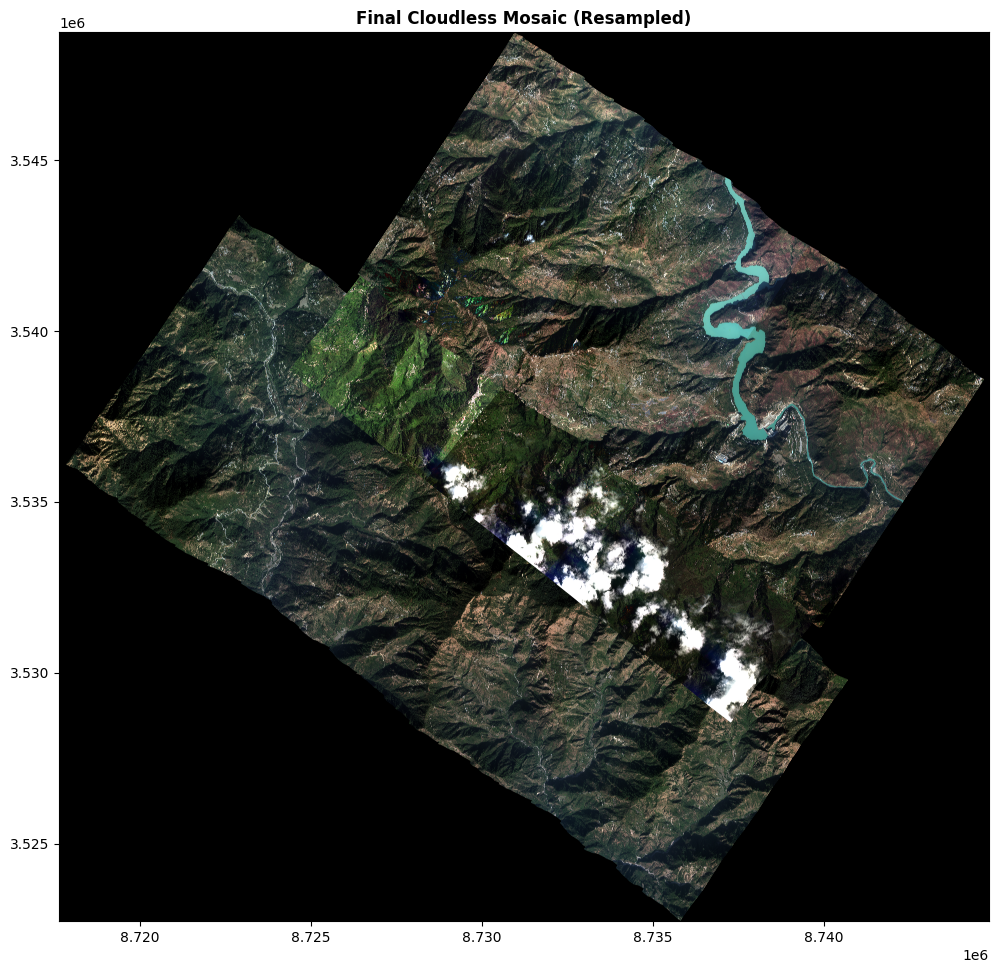

In [ ]:
print("Opening final mosaic for visualization...")
from rasterio.plot import show
import matplotlib.pyplot as plt

try:
    with rasterio.open(OUTPUT_FILENAME) as src:
        print("\n--- Final Output Metadata Verification ---")
        print(f"CRS: {src.crs}")
        print(f"Resolution: {src.res}")
        print(f"Bands: {src.count}")
        print(f"Width: {src.width}, Height: {src.height}")
        print("------------------------------------------")

        fig, ax = plt.subplots(figsize=(12, 12))
        
        show(src, ax=ax, title="Final Cloudless Mosaic (Resampled)")
        
        plt.show()
except Exception as e:
    print(f"Error during visualization: {e}")